# Exercises and Homework for week 3

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2022)
Nina Stiesdal & Thomas Erben

Homework is due on **Wednesday, 04/05/2022, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_3_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * First contact with `numpy`-arrays
 * Basic plots with matplotlib

**Your group number here please:**  Group XX

# 1. Lecture Review (0 points)

If you did the lecture review questions [03_Lecture_Review.ipynb](03_Lecture_Review.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

# 2. Numerical Integration (15 points)

We want to numerically estimate the integrals
$$
\int_0^{\pi}\sin(x)\,{\rm d}x = 2 \text{   and   } \int_{-1}^2 x^3\,{\rm d}x=\frac{15}{4}.
$$

We will do the estimation in the easiest possible way with Riemann sums: Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a partition of the interval $I$. With $\Delta x_i=x_{i+1}-x_i; i\in[0,n-1]$ and $f_{\Delta_i}=f\left(\frac{x_i+x_{i+1}}2\right)$, the integral can be approximated with
$$\int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1}\Delta x_i\cdot f_{\Delta_i}=I_{\rm approx}(n).$$ See the following figure for a visualisation of the method. You can read more on Riemann sums on [Wikipedia](https://en.wikipedia.org/wiki/Riemann_sum). 

<img src="figs/sin_cubic.png" style="width: 500px;" style="height: 250px;">



1. Implement the Riemann integration; Given numpy arrays with $x_i$ and corresponding function values, the calculations of $\Delta x_i$, $f_{\Delta_i}$ and the Riemann sum can be done with a single numpy-expression each.
2. Obviously, the accuracy of our numerical estimates depend on the partition of the interval $I=[a;b]$ and particularly on our choice of $n$. One can show that the absolute error $\epsilon_{\rm abs}(n)$ of the integral approximation with Riemann sums behaves like:
$$
\epsilon_{\rm abs}(n)=\left|I_{\rm approx}(n)-\int_a^bf(x)\,{\rm d}x\right| \propto n^{\alpha}.
$$
Perform some experiments to estimate $\alpha$. **Remark:** The task is deliberately vaguely formulated. To come up with a reasonable test is part of the exercise.
3. Modify your program from subtask 1 to estimate the indefinite integral
$$F(x)=\int_0^x \sin(y)\,{\rm d}y$$
in the interval $x\in[0;2\pi]$ and plot $F(x)$. Is the result what
you are expecting?
  **Hint for subtask (3):** Have a look at the function `numpy.cumsum`.

In [28]:
# Your solution for subtask (1) here please
import numpy as np
#for sin intergal
def f_sin(x):
    return np.sin(x)
def f_x3(x):
    return x**3
def Xi_array(a,b,n):
    x=np.linspace(a,b,n)
    return x
def delta_x(x):
    n=np.size(x)
    dx=np.zeros(n-1)
    for i in range(0,n-1):
        dx[i]=(x[i+1]-x[i])
    return dx
def f_delta(func,x):
    n=np.size(x)
    f=func(x)
    f_delta=np.zeros(n-1)
    for i in range(0,n-1):
        f_delta[i]=(f[i+1]+f[i])/2
    return f_delta
def remain_sum(func,a,b,n):
    x=Xi_array(a,b,n)
    result=delta_x(x)*f_delta(func,x)
    return np.sum(result)
#check code
print(remain_sum(f_x3,-1,2,20))
print(remain_sum(f_sin,0,np.pi,200))

3.768698060941828
1.9999584621373308


In [64]:
# Your solution for subtask (2) here please
# First def error
def error(n):#for func_sin, a=0, b=np.pi
    a=0
    b=np.pi
    theo_value = 2
    remain_intagel = remain_sum(f_sin,a,b,n)
    return np.abs(remain_intagel-theo_value)
n=np.logspace(1,3,10,dtype=int)
errors=np.zeros(10)
for i in range(0,10):
    errors[i]=error(n[i])
#print(errors)
result=np.log(errors)/np.log(n)
print('alpha is approx to ' + str(np.mean(result)))

alpha is approx to -1.8592791465152736


[ 4.99995833e-05  5.73012539e-02  2.16386559e-01  4.60120820e-01
  7.62174792e-01  1.08991929e+00  1.40794992e+00  1.68191168e+00
  1.88221005e+00  1.98720801e+00  1.98556329e+00  1.87745364e+00
  1.67455758e+00  1.39879285e+00  1.07994872e+00  7.52468014e-01
  4.51726447e-01  2.10211164e-01  5.40113543e-02 -2.22044605e-16]


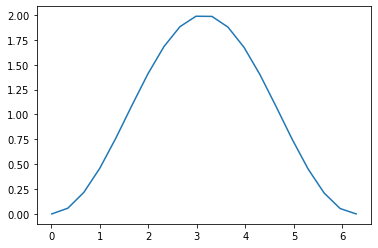

In [68]:
# Your solution for subtask (3) here please
a=0
b=np.linspace(0.01,2*np.pi,20)
n=500
F=np.zeros(20)
for i in range(0,20):
    F[i]=remain_sum(f_sin,a,b[i],n)
print(F)
import matplotlib.pyplot as plt
plt.plot(b,F)
plt.show()

## 3. Barplots (10 points)
Reproduce the Riemann Sums plots of Task 2 with `numpy` and `matplotlib`.

**Hints:** (1) Please have a  look at the function `matplotlib.pyplot.bar`; (2) You *do not* need to reproduce the exact colors, linewidths or label sizes of the plots.

In [ ]:
# Your solution here please

## 4. Strings (0 points)
Besides `numpy`-arrays, the second important Python-container to learn are strings. You probably already used them in your programs to print status messages or results. Strings are *homogeneous* containers of characters. I do not want to explicitely treat strings in lecture and I therefore ask you to watch the [video lecture on strings](https://youtu.be/OsQ28kHjLj0 ) and to do [string review questions](../video_lecture_01_strings/02_Strings_Review.ipynb) as part of this weeks homework tasks. The lecture notebook for strings is [here](../video_lecture_01_strings/01_Strings.ipynb).  

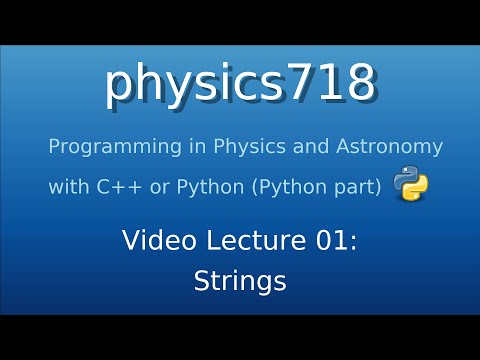

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('OsQ28kHjLj0')